In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

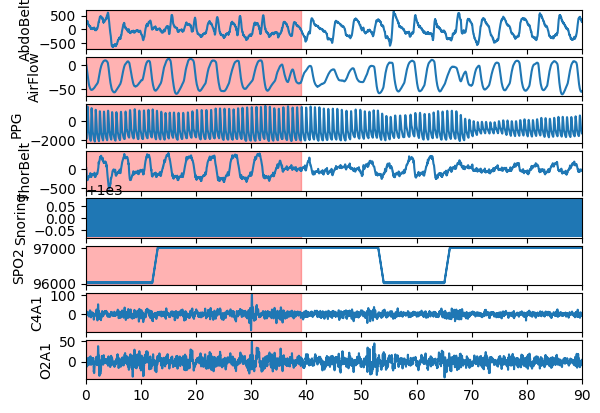

In [25]:
SIGNALS_NAME = [
    "AbdoBelt",
    "AirFlow",
    "PPG",
    "ThorBelt",
    "Snoring",
    "SPO2",
    "C4A1",
    "O2A1",
]


def extract_events_from_binary_mask(binary_mask, fs=1):
    binary_mask = np.array([0] + binary_mask.tolist() + [0])
    diff_data = np.diff(binary_mask)
    starts = np.where(diff_data == 1)[0] / fs
    ends = np.where(diff_data == -1)[0] / fs

    assert len(starts) == len(ends)
    events = []
    for i, _ in enumerate(starts):
        events += [(starts[i], ends[i])]

    return events


def visualize_signal_and_event(X, mask, signals_name=SIGNALS_NAME, signal_freq=100):
    n_signal = X.shape[0]
    fig, axs = plt.subplots(n_signal, sharex=True)
    events = extract_events_from_binary_mask(mask)
    for i in range(n_signal):
        axs[i].plot(np.arange(0, X[i].shape[0]) / signal_freq, X[i])
        axs[i].set_ylabel(signals_name[i])
        for elt in events:
            axs[i].axvspan(elt[0], elt[1], color='red', alpha=0.3)
    plt.xlim(0, X[0].shape[0]/ signal_freq)
    plt.show()


def visualise_index(idx, data_h5, masks, N_signals=8):
    x = data_h5['data'][idx, 2:]
    x = x.reshape(N_signals, -1)
    visualize_signal_and_event(x, np.array(masks[idx, 1:]))


if __name__ == "__main__":
    import h5py
    PATH_TO_TRAINING_DATA = r"C:\Users\giuli\Documents\Open_Campus\Open_campus_W25\Tensor_Flow\Apnea\X_test.h5"
    PATH_TO_TRAINING_TARGET = r"C:\Users\giuli\Documents\Open_Campus\Open_campus_W25\Tensor_Flow\Apnea\y_train_tX9Br0C.csv"
    h5_file = h5py.File(PATH_TO_TRAINING_DATA)
    mask = np.array(pd.read_csv(PATH_TO_TRAINING_TARGET))
    visualise_index(253, h5_file, mask)

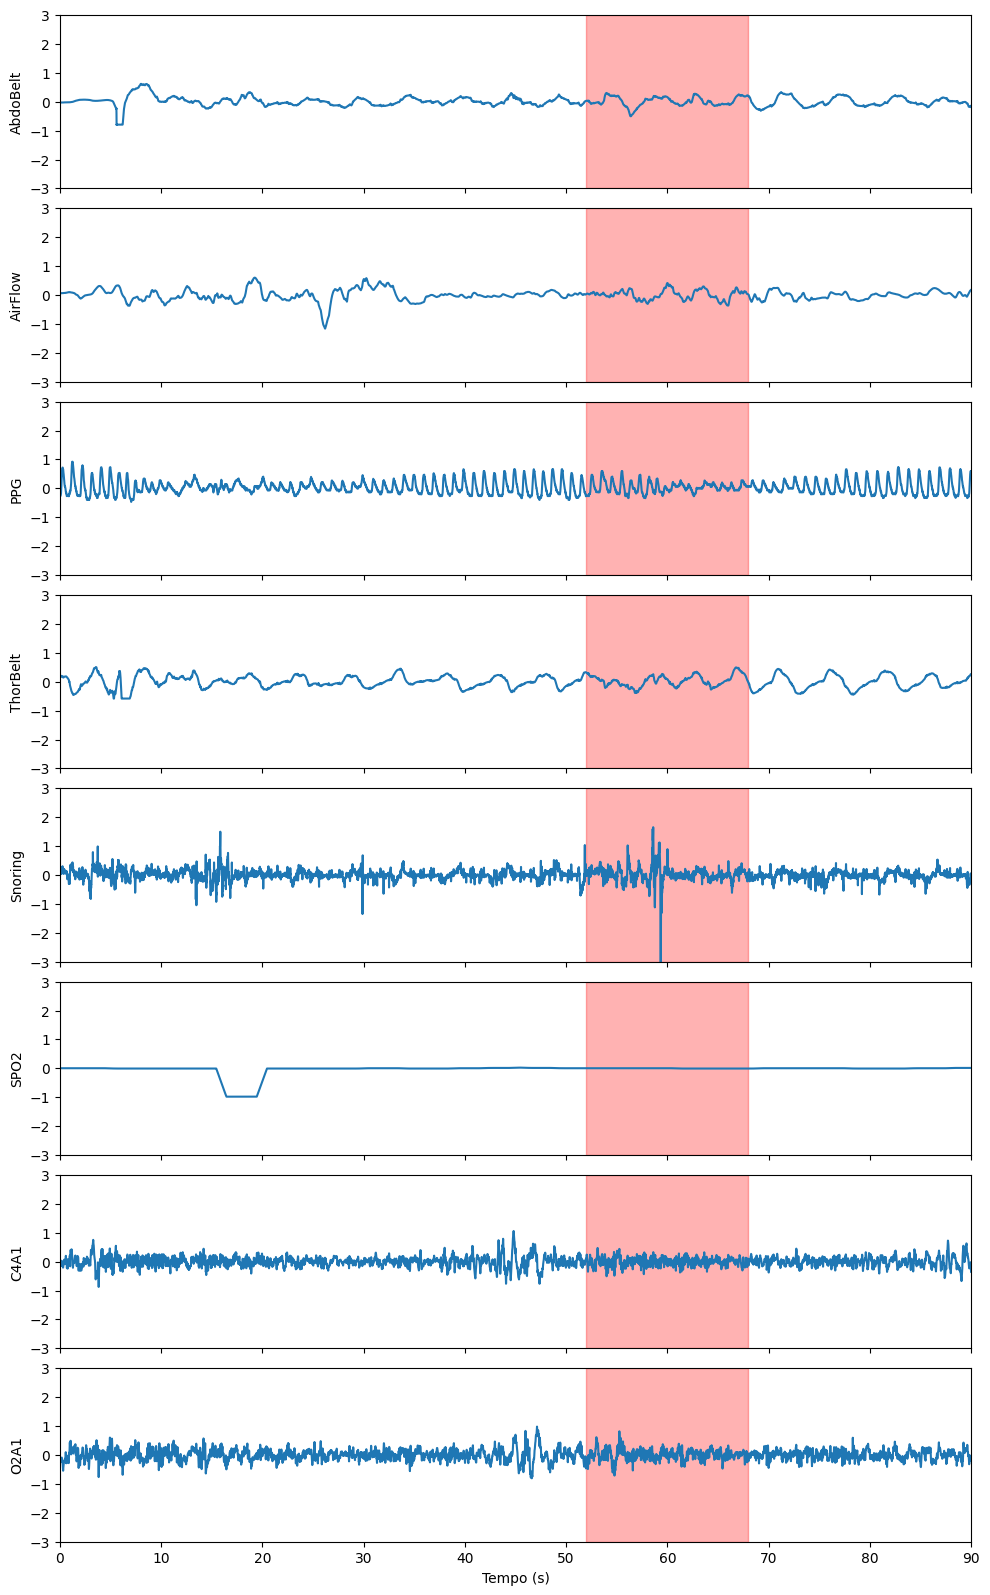

In [31]:
SIGNALS_NAME = [
    "AbdoBelt",
    "AirFlow",
    "PPG",
    "ThorBelt",
    "Snoring",
    "SPO2",
    "C4A1",
    "O2A1",
]


def extract_events_from_binary_mask(binary_mask, fs=1):
    binary_mask = np.array([0] + binary_mask.tolist() + [0])
    diff_data = np.diff(binary_mask)
    starts = np.where(diff_data == 1)[0] / fs
    ends = np.where(diff_data == -1)[0] / fs

    assert len(starts) == len(ends)
    events = []
    for i, _ in enumerate(starts):
        events += [(starts[i], ends[i])]

    return events


def visualize_signal_and_event(X, mask, signals_name=SIGNALS_NAME, signal_freq=100):
    import numpy as np
    import matplotlib.pyplot as plt

    n_signal = X.shape[0]
    fig, axs = plt.subplots(n_signal, sharex=True, figsize=(10, 2 * n_signal))
    events = extract_events_from_binary_mask(mask)

    # --- normalização canal a canal (z-score robusto) ---
    X_norm = np.zeros_like(X, dtype=float)
    for i in range(n_signal):
        x = X[i]
        med = np.nanmedian(x)
        p1, p99 = np.nanpercentile(x, [1, 99])
        scale = p99 - p1
        if scale == 0:
            scale = np.nanstd(x)
        if scale == 0:
            scale = 1.0
        X_norm[i] = (x - med) / scale
    # ------------------------------------------------------

    for i in range(n_signal):
        t = np.arange(0, X[i].shape[0]) / signal_freq
        axs[i].plot(t, X_norm[i])
        axs[i].set_ylabel(signals_name[i])

        # destaca eventos
        for start, end in events:
            axs[i].axvspan(start, end, color='red', alpha=0.3)

        # define escala y consistente
        axs[i].set_ylim(-3, 3)

    plt.xlim(0, X[0].shape[0] / signal_freq)
    axs[-1].set_xlabel("Tempo (s)")
    plt.tight_layout()
    plt.show()



def visualise_index(idx, data_h5, masks, N_signals=8):
    x = data_h5['data'][idx, 2:]
    x = x.reshape(N_signals, -1)
    visualize_signal_and_event(x, np.array(masks[idx, 1:]))


if __name__ == "__main__":
    import h5py
    PATH_TO_TRAINING_DATA = r"C:\Users\giuli\Documents\Open_Campus\Open_campus_W25\Tensor_Flow\Apnea\X_test.h5"
    PATH_TO_TRAINING_TARGET = r"C:\Users\giuli\Documents\Open_Campus\Open_campus_W25\Tensor_Flow\Apnea\y_train_tX9Br0C.csv"
    h5_file = h5py.File(PATH_TO_TRAINING_DATA)
    mask = np.array(pd.read_csv(PATH_TO_TRAINING_TARGET))
    visualise_index(0, h5_file, mask)


In [28]:
def visualize_signal_and_event(X, mask, signals_name=SIGNALS_NAME, signal_freq=100):
    import numpy as np
    import matplotlib.pyplot as plt

    n_signal = X.shape[0]
    fig, axs = plt.subplots(n_signal, sharex=True, figsize=(10, 2 * n_signal))

    events = extract_events_from_binary_mask(mask)

    for i in range(n_signal):
        t = np.arange(0, X[i].shape[0]) / signal_freq
        axs[i].plot(t, X[i])
        axs[i].set_ylabel(signals_name[i])

        # escala automática robusta — ignora outliers
        low, high = np.nanpercentile(X[i], [1, 99])
        if low == high:
            eps = 1e-6 if low == 0 else 1e-3 * abs(low)
            low -= eps
            high += eps
        axs[i].set_ylim(low, high)

        # destacar eventos
        for start, end in events:
            axs[i].axvspan(start, end, color='red', alpha=0.3)

    plt.xlim(0, X[0].shape[0] / signal_freq)
    axs[-1].set_xlabel("Tempo (s)")
    plt.tight_layout()
    plt.show()
